In [7]:
import logging
import math
import numpy as np
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
from scipy.stats import rankdata
from sklearn.preprocessing import normalize
from math import log
from mpl_toolkits.axes_grid1 import make_axes_locatable   

class Logger(object):
    def __init__(self, log_file_name, log_level, logger_name):
        self.__logger = logging.getLogger(logger_name)
        self.__logger.setLevel(log_level)
        file_handler = logging.FileHandler(log_file_name)
        console_handler = logging.StreamHandler()
        formatter = logging.Formatter(
            '[%(asctime)s] - [%(filename)s line:%(lineno)d] : %(message)s')
        file_handler.setFormatter(formatter)
        console_handler.setFormatter(formatter)
        self.__logger.addHandler(file_handler)
        self.__logger.addHandler(console_handler)

    def get_log(self):
        return self.__logger

def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom

logger = Logger('C:\\Users\\bird\\Desktop\\cancer_project_github\\log.txt', log_level=logging.DEBUG, logger_name="CIFAR").get_log()

clinical_file = 'C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\clinical_sample_data.csv'
mRNA_file = 'C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\data_mRNA_seq_fpkm_polya_56M.csv'

# clinical_244_file = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\clinical_244_data.csv'
# mRNA_244_file = 'C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\data_mRNA_244.csv'

clinical_231_file = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\clinical_231_data.csv'
mRNA_231_file = 'C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\data_mRNA_231.csv'

clinical_df=pd.read_csv(clinical_231_file)
mRNA_231_df=pd.read_csv(mRNA_231_file)


In [17]:


mRNA_231_df=pd.read_csv(mRNA_231_file)
# print(mRNA_244_df)
# print(mRNA_231_df)
mRNA_231_df = mRNA_231_df.set_index('SAMPLE_ID')
# print(mRNA_244_df['0'].tolist())
# print(mRNA_231_df)
patient_mRNA = []
for column in mRNA_231_df:
    
#     print(mRNA_244_df[column].tolist())
    patient_mRNA.append(mRNA_231_df[column].tolist())
# print(patient_mRNA[0])
patient_np = np.asarray(patient_mRNA)
# r = np.corrcoef(patient_np, patient_np)
# r

# method 1
# sidx = np.argsort(patient_np, axis=1)
# m,n = patient_np.shape
# out = np.empty((m,n),dtype=int)
# out[np.arange(m)[:,None], sidx] = np.arange(n)

# patient_np = np.floor(scale(patient_np, 0, 100))
# print("patient_np")

# print((patient_np.max(axis=0)).min())
# method 2
print(patient_np.shape)

# sidx = np.argsort(patient_np, axis=1)
# m,n = patient_np.shape
# out = np.empty((m,n),dtype=int)
# sidx = np.argsort(patient_np, axis=0)
# out[sidx, np.arange(n)] = np.arange(m)[:,None]
# oned = patient_np.flatten()
# print(oned.shape)
# ranks = (rankdata(oned, method='dense') - 1).astype(int)  # normalisation method 2
# print('ranks')
# print(ranks.shape)
# patient_np =  np.reshape(ranks, (-1, 19293))
# print(patient_np.shape)
# print(patient_np)
# patient_np = scale(patient_np, 0, 100) 


# correlations = []
# for i in range(0, len(patient_mRNA)):
#     for j in  range(i+1, len(patient_mRNA)):
#         i_np = np.asarray(patient_mRNA[i])
#         j_np = np.asarray(patient_mRNA[j])
#         r = np.corrcoef(i_np, j_np)
        
#         correlations.append(r[0,1])
# #         if r[0,1] < 0.4:
# #             print('----')
# #             print(i)
# #             print(j)
# #             print('----')
# #             print(r[0,1])
# # correlations = [ round(elem, 2) for elem in correlations ]
# print(correlations)



(231, 19293)


In [15]:
def sort_within_each_cancer(patient_np, norm = ''):
    if norm == 'scale_and_bin':
        patient_np = np.floor(scale(patient_np, 0, 100))
    r = np.corrcoef(patient_np, patient_np)
    correlation_matrix = r[0:117, 0:117] #LN 0-117, Bone 117-191, Liver 191-231
    # print(correlation_matrix)
    corr_means = correlation_matrix.mean(axis=0)
    # x = dict(zip(corr_means, range(0,117)))
    # print(x)
    ranks = np.argsort(-corr_means)
    # print(ranks)
    correlation_matrix = r[117:191, 117:191] #LN 0-117, Bone 117-191, Liver 191-231
    # print(correlation_matrix)
    corr_means = correlation_matrix.mean(axis=0)

    ranks_t= np.argsort(-corr_means) + 117
    ranks = np.concatenate([ranks, ranks_t]) 
    # print(ranks)
    correlation_matrix = r[191:231, 191:231] #LN 0-117, Bone 117-191, Liver 191-231
    # print(correlation_matrix)
    corr_means = correlation_matrix.mean(axis=0)

    ranks_t = np.argsort(-corr_means) + 191
    ranks = np.concatenate([ranks, ranks_t]) 
    # print(ranks)
    # print(len(ranks))
    # print(ranks.min())
    # print(ranks.max())

    correlation_matrix = r[0:231, 0:231]
    correlation_matrix = correlation_matrix[:, ranks][ranks]
    # print(correlation_matrix)
    # pd.DataFrame(correlation_matrix).to_csv('C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\temp.csv')
    return correlation_matrix


def sort_with_all_cancers(patient_np, norm = ''):
    if norm == 'scale_and_bin':
        patient_np = np.floor(scale(patient_np, 0, 100))
    r = np.corrcoef(patient_np, patient_np)
    correlation_matrix = r[ 0:231,0:117] #LN 0-117, Bone 117-191, Liver 191-231
#     print(len(correlation_matrix[0]))
    corr_means = correlation_matrix.mean(axis=0)
    # print(x)
    ranks = np.argsort(-corr_means)
#     print(ranks)
#     print(len(ranks))
    correlation_matrix = r[0:231, 117:191] #LN 0-117, Bone 117-191, Liver 191-231
    # print(correlation_matrix)
    corr_means = correlation_matrix.mean(axis=0)

    ranks_t= np.argsort(-corr_means) + 117
    ranks = np.concatenate([ranks, ranks_t]) 

    correlation_matrix = r[0:231, 191:231] #LN 0-117, Bone 117-191, Liver 191-231
    # print(correlation_matrix)
    corr_means = correlation_matrix.mean(axis=0)

    ranks_t = np.argsort(-corr_means) + 191
    ranks = np.concatenate([ranks, ranks_t]) 
#     print(ranks)
#     print(len(ranks))
    # print(ranks.min())
    # print(ranks.max())

    correlation_matrix = r[0:231, 0:231]
    correlation_matrix = correlation_matrix[:, ranks][ranks]
    # print(correlation_matrix)
    # pd.DataFrame(correlation_matrix).to_csv('C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\temp.csv')
    return correlation_matrix

def norm_and_sort_patients(patient, params ):
    scheme, norm, sort_s, norm_s= params
    patient_np = patient
    if norm == 'linear_scale_and_bin':
        patient_np = np.floor(scale(patient_np, 0, 100))
    if norm == 'log_scale_and_bin':
        patient_np = np.log10(patient_np+0.0000001)
        patient_np = np.floor(scale(patient_np, 0, 100))
    if norm == 'rank_and_scale': 
        x = patient_np.T
        def rd(x):
            return  (rankdata(x, method='dense') - 1).astype(int)
        x = np.apply_along_axis(rd, 1, x)
        patient_np = scale(x.T,0,100)
        
      
    r = np.corrcoef(patient_np, patient_np)
    ranks = []
    if scheme == '':
        return r[0:231, 0:231], patient_np
    if scheme == 'homo':
        correlation_matrix = r[0:117, 0:117] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = correlation_matrix.mean(axis=0)
        ranks = np.argsort(-corr_means)
        correlation_matrix = r[117:191, 117:191] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = correlation_matrix.mean(axis=0)
        ranks_t= np.argsort(-corr_means) + 117
        ranks = np.concatenate([ranks, ranks_t]) 
        correlation_matrix = r[191:231, 191:231] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = correlation_matrix.mean(axis=0)
        ranks_t = np.argsort(-corr_means) + 191
        ranks = np.concatenate([ranks, ranks_t]) 

    if scheme == 'hetero':
        correlation_matrix = r[ 0:231,0:117] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = correlation_matrix.mean(axis=0)
        ranks = np.argsort(-corr_means)
        correlation_matrix = r[0:231, 117:191] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = correlation_matrix.mean(axis=0)
        ranks_t= np.argsort(-corr_means) + 117
        ranks = np.concatenate([ranks, ranks_t]) 
        correlation_matrix = r[0:231, 191:231] #LN 0-117, Bone 117-191, Liver 191-231
        corr_means = correlation_matrix.mean(axis=0)
        ranks_t = np.argsort(-corr_means) + 191
        ranks = np.concatenate([ranks, ranks_t]) 

    correlation_matrix = r[0:231, 0:231]
    correlation_matrix = correlation_matrix[:, ranks][ranks]
    
    return correlation_matrix, patient_np

Graph Plot A,B,C

C:\Users\bird\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


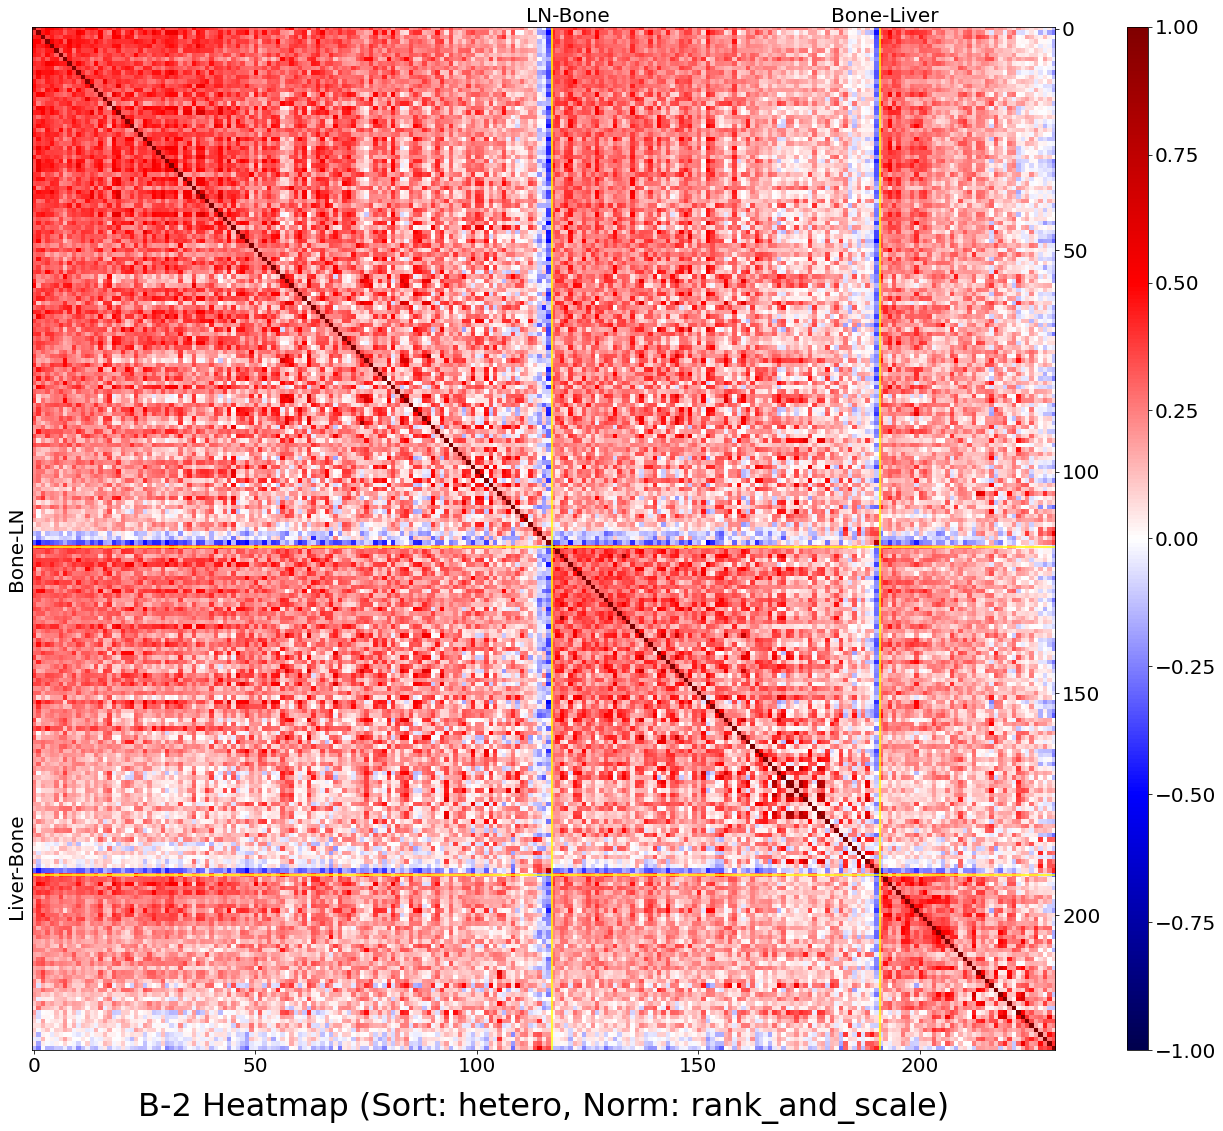

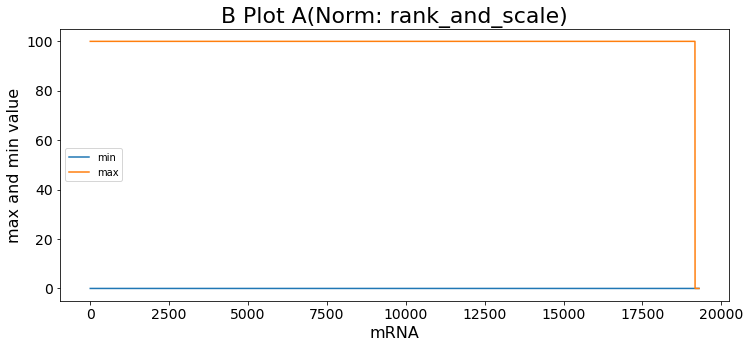

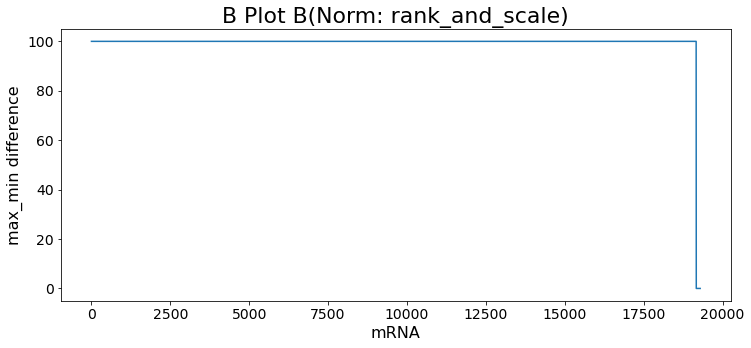

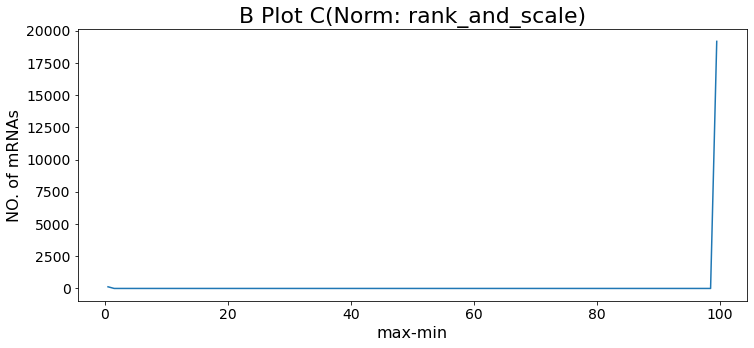

In [30]:
# mRNA_231_file = 'C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\data_mRNA_231.csv'
# mRNA_231_df=pd.read_csv(mRNA_231_file)
# max_min_df = mRNA_231_df[['max','min','diff']]
# df1 = max_min_df.sort_values(['max', 'min'], ascending=[False, False])
# max_np = df1['max'].to_numpy()
# # max_np = np.log2(max_np+0.0001)
# max_np = scale(max_np, 0, 100)

# min_np = df1['min'].to_numpy()
# # min_np = np.log2(min_np+0.0001)
# min_np = scale(min_np, 0, 100)
# print(patient_np)
patient_np = np.asarray(patient_mRNA) 


def plot_heatmap(correlation_matrix, params):
#     r = np.corrcoef(patient_np, patient_np)

#     correlation_matrix = r[0:231, 0:231]
    # correlation_matrix = scale_floor(correlation_matrix, 0, 100) # normalisation method 1

#     print(correlation_matrix.mean(axis=0))
    scheme, norm, sorts, norms= params
    if not scheme in sorts:
        scheme = ''
    if not norm in norms:
        norm = ''
    ref_1 = norms.get(norm)
    ref_2 = sorts.get(scheme)
    if scheme: 
        scheme = '(Sort: '+scheme
        if norm:
            norm = ', Norm: ' + norm +')'
        else:
            norm = ', Norm: None)'
    else:
        scheme = '(Sort: None'
        if norm:
            norm = ', Norm: ' + norm +')'
        else:
            norm = ', Norm: None)'
        
    f = plt.figure(figsize=(20,20))
    
    plt.rc('xtick',labelsize=20)
    plt.rc('ytick',labelsize=20)
    
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()

    # LN 117, Bone 74, Liver 40,Prostate 7,Lung 6
    plt.plot([117, 117], [0, 231], 'yellow')
    plt.plot([0, 244], [117, 117], 'yellow')
    plt.plot([191, 191], [0, 231], 'yellow')
    plt.plot([0, 244], [191, 191], 'yellow')
    plt.text(111, -1.5, 'LN-Bone', fontsize=20)
    plt.text(-6, 126, 'Bone-LN', rotation = 90, fontsize=20)
    plt.text(180, -1.5, 'Bone-Liver', fontsize=20)
    plt.text(-6,200, 'Liver-Bone', rotation = 90, fontsize=20)
    img = plt.imshow(correlation_matrix, cmap='seismic',vmin=-1, vmax=1, interpolation='nearest') #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    title = ref_1+'-'+ ref_2+' Heatmap ' + scheme + norm
    plt.title(title, y=-0.07, fontsize=32)
    ax = plt.subplot(111)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=1)

    plt.colorbar(img,cax=cax)
    plt.show()



def plot_ABC(patient_np, params):
    scheme, norm, sorts, norms= params
    if not scheme in sorts:
        scheme = ''
    if not norm in norms:
        norm = ''
    ref_1 = norms.get(norm)
    
    if norm:
        norm = '(Norm: ' + norm +')'
    else:
        norm = '(Norm: None)'
            
    max_np = patient_np.max(axis=0)
    min_np = patient_np.min(axis=0)
    max_min_df = pd.DataFrame({"max": max_np, "min": min_np})
    df1 = max_min_df.sort_values(['max', 'min'], ascending=[False, False])
    max_np_sort = df1['max'].to_numpy()
    min_np_sort = df1['min'].to_numpy()
#     max_np_sort = np.log(max_np_sort)
#     min_np_sort = np.log(min_np_sort)
    diff_np = max_np - min_np
    
    plt.figure(figsize=(12,5))
    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    plt.plot(min_np_sort, label='min')
    plt.plot(max_np_sort, label='max')
    plt.legend()
    plt.ylabel('max and min value', fontsize=16)
    plt.xlabel('mRNA', fontsize=16)
    title =ref_1+' Plot A' + norm
    plt.title(title, fontsize=22)
    
#     plt.yscale('log')#///
    plt.show()


    diff_min_df = pd.DataFrame({"diff": diff_np, "min": min_np})
    df2 = diff_min_df.sort_values(['diff', 'min'], ascending=[False, True])
    diff_np = df2['diff'].to_numpy()
#     print(diff_np)
#     diff_np = np.log(diff_np+0.00000001)

    plt.figure(figsize=(12,5))
    plt.ylabel('max_min difference', fontsize=16)
    plt.xlabel('mRNA', fontsize=16)
    title =  ref_1+ ' Plot B' + norm
    plt.title(title, fontsize=22)
#     plt.yscale('log')#////
    plt.plot(diff_np)
    plt.show()

#     where_0 = np.where(diff_np == 0)#///
#     diff_np[where_0] = 0.0001#///
#     diff_np = np.log10(diff_np)#///
    
    n = 100
    s = diff_np.tolist()  # generate your data sample with N elements
    p, x = np.histogram(s, bins=n) # bin it into n bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
#     f = UnivariateSpline(x, p, s=n)
#     y = f(x)
    
#     x = 10**x#///
    
#     cdfy = np.cumsum(y)
    plt.figure(figsize=(12,5))
    plt.xlabel('max-min', fontsize=16)
    plt.ylabel('NO. of mRNAs', fontsize=16)
    title = ref_1+' Plot C' + norm
    plt.title(title, fontsize=22)
#     plt.xscale('log')#///
    plt.plot(x, p)
    plt.show()

sorts = {"":'0',
    "homo":'1',
    "hetero":"2"}

norms = {'': '0',
         'linear_scale_and_bin': 'A',
         'log_scale_and_bin': 'A',
         'rank_and_scale': 'B'
}

params = ['hetero','rank_and_scale', sorts, norms] # scheme = {'', 'hetero' 'homo'}, norm = {'', 'scale_and_bin_linear', 'scale_and_bin_log','rank_and_scale'}
correlation_matrix, patient_np = norm_and_sort_patients(patient_np, params)#hetero homo scale_and_bin rank_and_scale
plot_heatmap(correlation_matrix,params)
plot_ABC(patient_np,params)
